#Define

In [5]:
# Data treatment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

# Graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid", context = "notebook")

In [6]:
data= "/content/insurance.csv" 
df_mca = pd.read_csv(data)
df_mca.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#INFO

In [7]:
df_mca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Describe numeric variables
df_mca.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


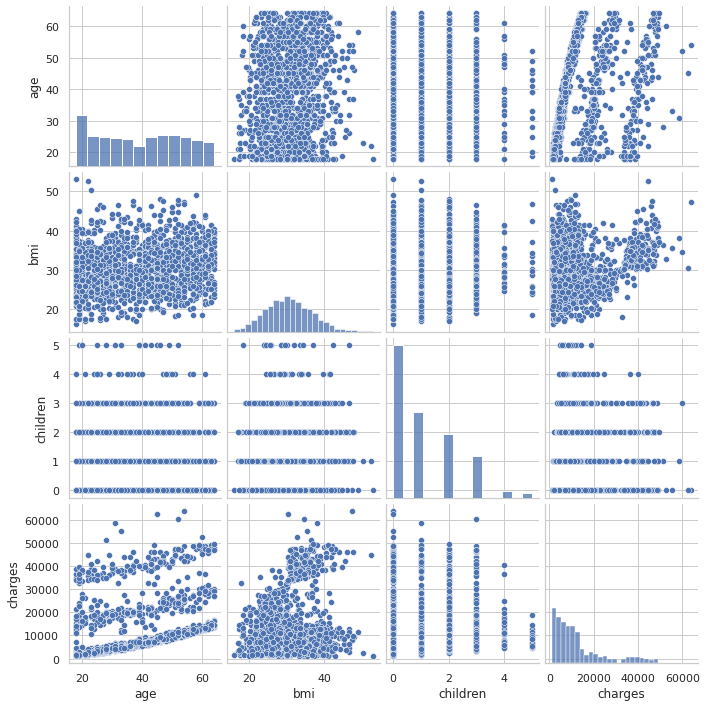

In [16]:
# Comparative all numerical variables

numeric_cols = ["age","bmi","children","charges"]
sns.pairplot(df_mca[numeric_cols], height = 2.5)
plt.plot()
plt.show()

#BMI

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


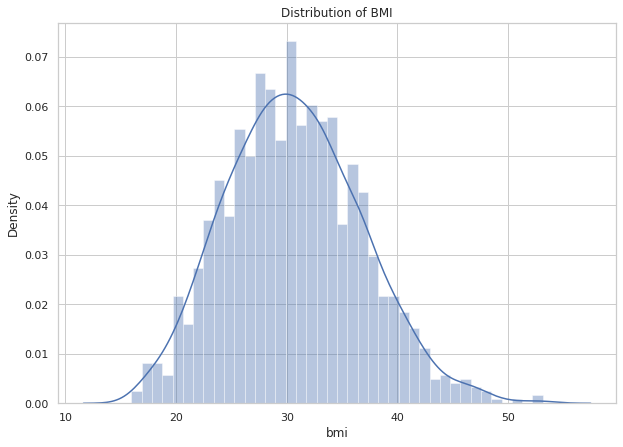


**************Distribution of BMI*********************

Percentage of people  underweight : 1.4947683109118086

Percentage of people  ideal bmi  : 16.591928251121075

Percentage of people  owerweight: 28.400597907324364

Percentage of people  obese: 29.671150971599403

Percentage of people  extermly obese: 23.84155455904335


In [56]:
# Understanding bmi

min_ideally = 18.5 # Normal weight BMI is between 18.5 and 24.9
max_ideally = 24.9
over_weight_max=29.9# between 24,9 and 29,9 overweight
obese=34.9 # between 29,9 and 34,9 overweight

fig, ax = plt.subplots(figsize = (10,7))
sns.distplot(df_mca.bmi, bins=40)
plt.title('Distribution of BMI')
plt.show()

 #UnderWeight Ratio
bmi_under = (df_mca["bmi"] >=0) & (df_mca["bmi"] < min_ideally)
under_ratio = len(df_mca["bmi"][bmi_under])/len(df_mca)
#ideal ratio
bmi_ideal = (df_mca["bmi"] >=min_ideally) & (df_mca["bmi"] <= max_ideally)
ideal_ratio = len(df_mca["bmi"][bmi_ideally_bool])/len(df_mca)
#owerweight ratio
bmi_ower = (df_mca["bmi"] > max_ideally) & (df_mca["bmi"] <= over_weight_max)
ower_ratio = len(df_mca["bmi"][bmi_ower])/len(df_mca)

#obese ratio
bmi_obese= (df_mca["bmi"] > over_weight_max) & (df_mca["bmi"] <=obese)
obese_ratio = len(df_mca["bmi"][bmi_obese])/len(df_mca)
#extermly obese
bmi_eobese= (df_mca["bmi"] > obese) & (df_mca["bmi"] <=100)
eobese_ratio = len(df_mca["bmi"][bmi_eobese])/len(df_mca)


print("\n**************Distribution of BMI*********************")
print("\nPercentage of people  underweight :", under_ratio*100 )
print("\nPercentage of people  ideal bmi  :", ideal_ratio*100 )
print("\nPercentage of people  owerweight:", ower_ratio*100 )
print("\nPercentage of people  obese:", obese_ratio*100 )
print("\nPercentage of people  extermly obese:", eobese_ratio*100 )



#Smokers and Charges

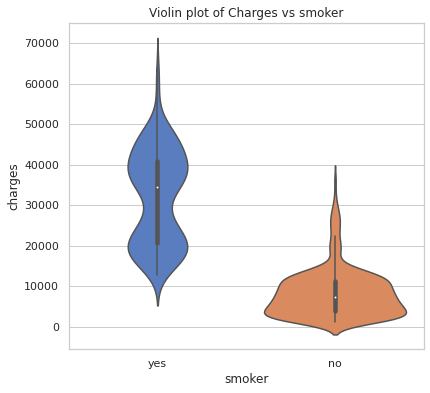

In [71]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df_mca,palette='muted',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

#Smoker and Region

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


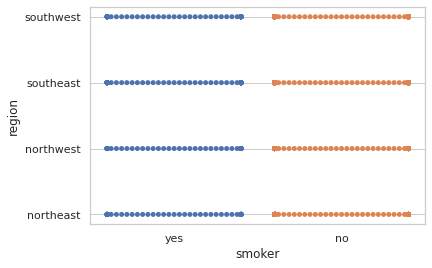

In [76]:



sns.swarmplot(x=df_mca['smoker'],y=df_mca['region'])

#BMI  and Sex


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


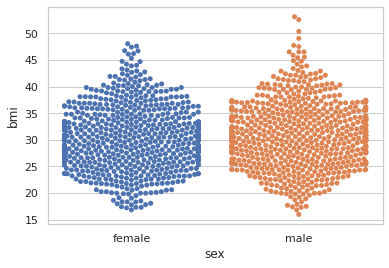

In [81]:
sns.swarmplot(x=df_mca['sex'],y=df_mca['bmi'])
plt.show()

A higher BMI is observed in male

#Chlidren and Region


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 79.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 82.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 81.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


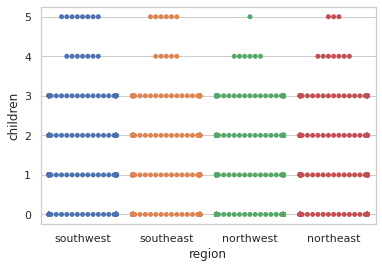

,region,count
0,southwest,371
1,southeast,382
2,northwest,373
3,northeast,339


In [90]:
sns.swarmplot(x=df_mca['region'],y=df_mca['children'])
plt.show()


total_children = df_mca.children.groupby(df_mca.region)

region = []
count = []
for i in df_mca.region.unique():
    region.append(i)
    count.append(total_children.get_group(i).sum())
pd.DataFrame(region, columns=['region']).join(
    pd.DataFrame(count, columns=["count"]))


No sharp relationship was found between the distribution of children and regions. Region with the highest number of children is Southeast

#Age and BMI

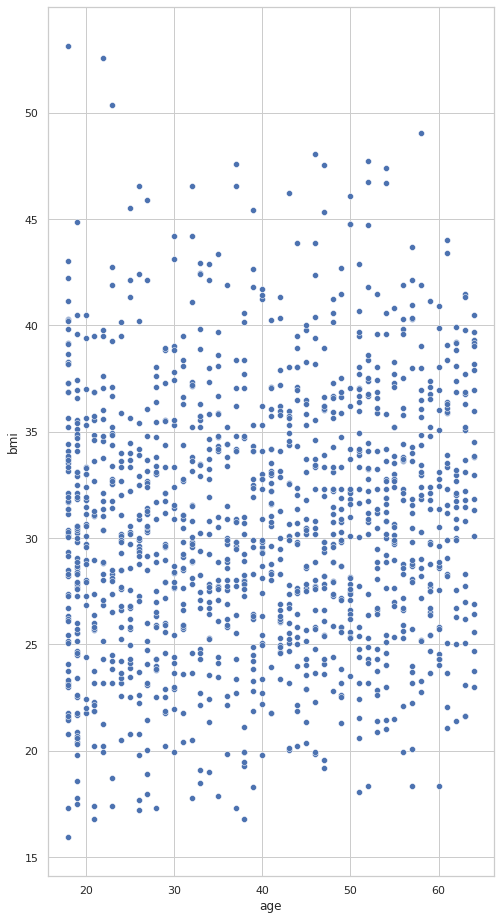

In [125]:
plt.subplots(figsize = (8,16))
sns.scatterplot(data = df_mca, x = "age", y = "bmi")
plt.show()

#BMI and Chldiren

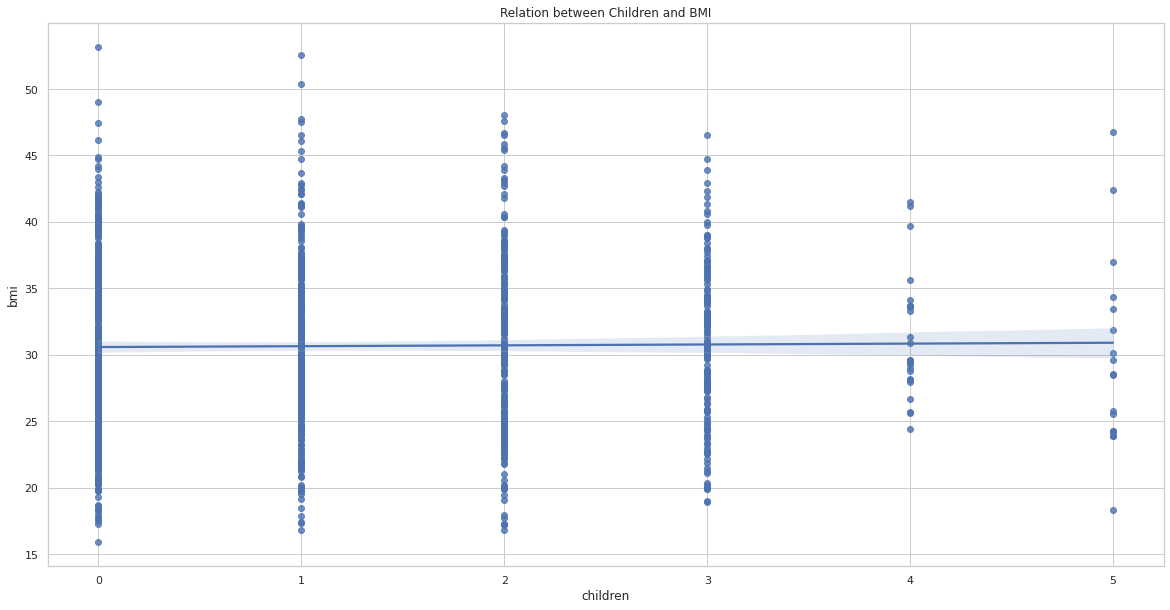

In [92]:
plt.figure(figsize=(20,10))
plt.title('Relation between Children and BMI')
sns.regplot(x=df_mca['children'], y=df_mca['bmi'])

#BMI and Charges

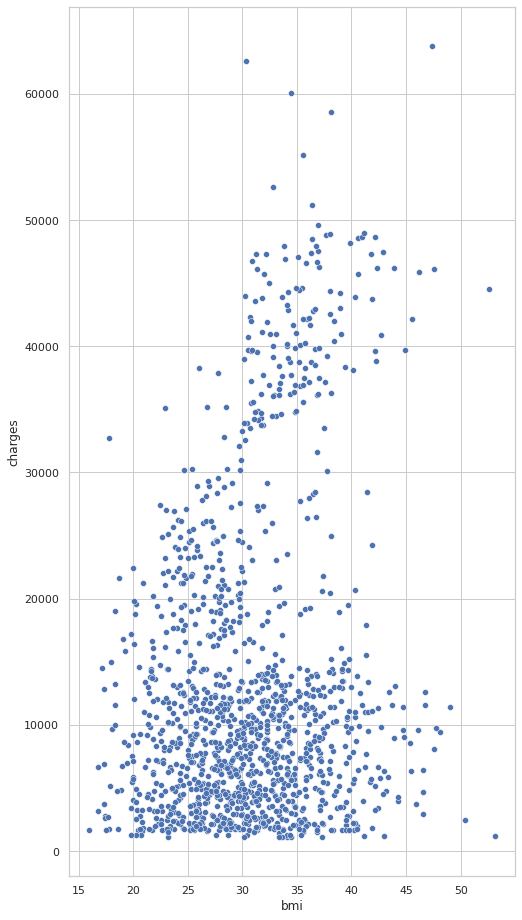

In [127]:
plt.subplots(figsize = (8,16))
sns.scatterplot(data = df_mca, x ="bmi", y =  "charges")
plt.show()

#BMI Outliner

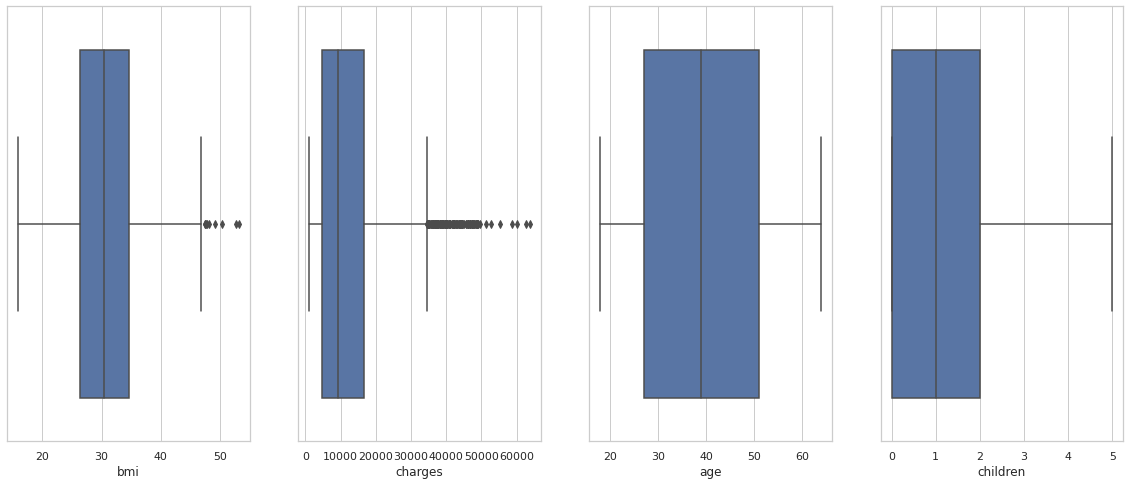

In [101]:
fig, axes = plt.subplots(figsize=(20, 8), nrows=1, ncols=4)
sns.boxplot(x=df_mca.bmi, ax=axes[0])
sns.boxplot(x=df_mca.charges, ax=axes[1])
sns.boxplot(x=df_mca.age, ax=axes[2])
sns.boxplot(x=df_mca.children, ax=axes[3])
plt.show()


#BMI and Chargers

#Region Smokers and BMI

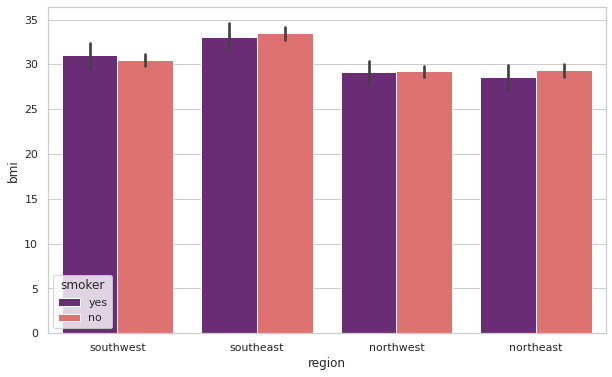

In [111]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='region', y='bmi', data=df_mca, hue='smoker', palette='magma')